<a href="https://colab.research.google.com/github/palienko105/Projects/blob/main/RFM_analysis_python_SuperStore_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/datasets/laibaanwer/superstore-sales-dataset?resource=download

In [1]:
#Ссылка на файл
url = 'https://drive.google.com/file/d/1WaRy2qK-z3y7dMCJW4COecWXGOszzHFc/view?usp=sharing'

In [2]:
! gdown --id 1WaRy2qK-z3y7dMCJW4COecWXGOszzHFc

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1WaRy2qK-z3y7dMCJW4COecWXGOszzHFc
To: /content/SuperStore_1.zip
100% 2.28M/2.28M [00:00<00:00, 55.6MB/s]


In [3]:
! unzip /content/SuperStore_1.zip

Archive:  /content/SuperStore_1.zip
  inflating: SuperStoreOrders.csv    


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv('/content/SuperStoreOrders.csv')

In [6]:
df.head(200)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.1400,35.46,Medium,2011
1,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.0360,9.72,Medium,2011
2,HU-2011-1220,1/1/2011,5/1/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.6400,8.17,High,2011
3,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.0550,4.82,High,2011
4,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.7700,4.70,Medium,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,CA-2011-118192,14-01-2011,19-01-2011,Standard Class,Michael Moore,Consumer,Ohio,United States,US,East,...,Office Supplies,Paper,Xerox 1923,37,7,0.2,13.0928,1.46,Medium,2011
196,CA-2011-162775,14-01-2011,16-01-2011,Second Class,Chris Selesnick,Corporate,Louisiana,United States,US,South,...,Office Supplies,Binders,Staples,6,3,0.0,2.7072,0.85,Critical,2011
197,TU-2011-4040,14-01-2011,18-01-2011,Standard Class,Bruce Degenhardt,Consumer,Gaziantep,Turkey,EMEA,EMEA,...,Office Supplies,Art,"Stanley Canvas, Blue",79,4,0.6,-87.1680,0.43,Medium,2011
198,CA-2011-118192,14-01-2011,19-01-2011,Standard Class,Michael Moore,Consumer,Ohio,United States,US,East,...,Office Supplies,Binders,Avery Metallic Poly Binders,3,2,0.7,-2.5212,0.27,Medium,2011


# Приведем столбцы 'order_date' и 'ship_date' к читаемому виду (ГГГГ-ММ-ДД)

In [7]:
def dt(x):
  if x.find('-') != -1:
    return pd.to_datetime(x, format='%d-%m-%Y')
  else:
    return pd.to_datetime(x, format='%d/%m/%Y')

In [8]:
df['order_date'] = df['order_date'].apply(dt)

In [9]:
df['ship_date'] = df['ship_date'].apply(dt)

In [10]:
f"Дата первого заказа = {df['order_date'].min()}, Дата последнего заказа = {df['order_date'].max()}"

'Дата первого заказа = 2011-01-01 00:00:00, Дата последнего заказа = 2014-12-31 00:00:00'

In [11]:
f"Дата первой доставки заказа = {df['ship_date'].min()}, Дата последней доставки заказа = {df['ship_date'].max()}"

'Дата первой доставки заказа = 2011-01-03 00:00:00, Дата последней доставки заказа = 2015-01-07 00:00:00'

# Проведем первичный анализ данных

In [12]:
df.isna().mean()

order_id          0.0
order_date        0.0
ship_date         0.0
ship_mode         0.0
customer_name     0.0
segment           0.0
state             0.0
country           0.0
market            0.0
region            0.0
product_id        0.0
category          0.0
sub_category      0.0
product_name      0.0
sales             0.0
quantity          0.0
discount          0.0
profit            0.0
shipping_cost     0.0
order_priority    0.0
year              0.0
dtype: float64

In [13]:
df.dtypes

order_id                  object
order_date        datetime64[ns]
ship_date         datetime64[ns]
ship_mode                 object
customer_name             object
segment                   object
state                     object
country                   object
market                    object
region                    object
product_id                object
category                  object
sub_category              object
product_name              object
sales                     object
quantity                   int64
discount                 float64
profit                   float64
shipping_cost            float64
order_priority            object
year                       int64
dtype: object

Переведем столбец sales в тип float:

In [14]:
df['sales'] = df['sales'].apply(lambda x: float(x.replace(',','')))

In [15]:
df.duplicated().mean()

0.0

In [16]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [17]:
t = df[['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'country','region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year']].copy()

In [18]:
t.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,country,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Algeria,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.0,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,Australia,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.0,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Hungary,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.0,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Sweden,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",45.0,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,Australia,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114.0,5,0.1,37.770,4.70,Medium,2011


[Text(0, 0.5, 'orders')]

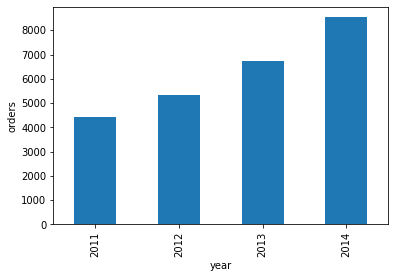

In [19]:
g = t.groupby('year')['order_id'].agg('nunique').plot(kind='bar')
g.set(ylabel='orders')

In [20]:
t.groupby(['year', 'category']).agg({'order_id':'nunique', 'profit':'sum'})

order_id        profit
year category                               
2011 Furniture            1479   53696.92640
     Office Supplies      3344   85996.53430
     Technology           1448  109247.35084
2012 Furniture            1714   58132.83400
     Office Supplies      4112  103305.50780
     Technology           1815  145976.93730
2013 Furniture            2230   85640.43050
     Office Supplies      5027  149245.73580
     Technology           2249  173626.59388
2014 Furniture            2772   89312.06290
     Office Supplies      6520  179926.05640
     Technology           2842  234927.85116



1.   Категория товаров "Technology" является самой прибыльной для магазина на протяжении 4-х лет. 
2.   Чаще всего люди заказывают Офисные принадлежности, данная категория товаров находится на 2 месте по прибыли.
3.   Мебель и прочие принадлежности для дома и офиса заказывают примерно с той же частотой, что и технику, но категория "Furniture" является наименее прибыльной.






In [21]:
t.groupby(['year']).agg({'order_id':'nunique', 'profit':'sum'})

,order_id,profit
year,,
2011,4440,248940.81154
2012,5343,307415.27910
2013,6721,408512.76018
2014,8531,504165.97046


Число заказов и прибыль магазина растут с каждым годом

# RFM анализ на Python

**На основе данных проведу RFM анализ. Разделю клиентов на группы, чтобы примерно понимать портрет нашей целевой аудитории (ЦА). Данный анализ позволит сегментировать клиентов магазина и создать эффективную стратегию по работе со всеми видами клиентов.**

**Т.к. статистика по продажам есть только с 2011 по 2014 года, то предположим, что мы хотим разработать стратегию по взаимодействию с клиентами на начало 2015 года. Т.е. Давность покупки (R) будем смотреть относительно 2015-01-01. Анализировать будем информацию по заказам за 2014 год.**



*   Т.к. в таблице нет уникального идентификатора покупателя, то будем считать, что уникальный идентификатор пользователя == 'customer_name'.
*   В столбце 'sales' указана суммарная цена товара с учетом 'quantity' и 'discount'.



1.   Recency — Давность (R) как количество дней с момента последней покупки
2.   Frequency — количество транзакций. Сколько раз клиент совершал покупки в нашем магазине.
3.   Monetary — сумма покупок. Сколько $ (или любой другой валюты расчета) потратил этот клиент.



In [22]:
t = t[t['year'] == 2014]

In [52]:
t

,order_id,order_date,ship_date,ship_mode,customer_name,segment,country,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
33759,ES-2014-2774938,2014-01-01,2014-01-03,Second Class,Fred Harton,Consumer,France,Central,TEC-MA-10001777,Technology,Machines,"Okidata Printer, Red",677.0,3,0.15,-111.6225,104.69,High,2014
33760,IN-2014-47134,2014-01-01,2014-01-05,Standard Class,Kean Nguyen,Corporate,Australia,Oceania,TEC-MA-10002134,Technology,Machines,"Konica Inkjet, Wireless",846.0,3,0.10,46.9980,46.20,Medium,2014
33761,IT-2014-4810734,2014-01-01,2014-01-03,Second Class,Alan Shonely,Consumer,France,Central,TEC-PH-10002586,Technology,Phones,"Nokia Office Telephone, with Caller ID",332.0,6,0.15,-43.1370,37.85,Critical,2014
33762,US-2014-105830,2014-01-01,2014-01-03,First Class,Duane Benoit,Consumer,United States,East,OFF-ST-10002554,Office Supplies,Storage,Tennsco Industrial Shelving,157.0,4,0.20,-35.2152,30.66,High,2014
33763,CA-2014-160395,2014-01-01,2014-01-07,Standard Class,Kelly Lampkin,Corporate,United States,West,OFF-BI-10003984,Office Supplies,Binders,Lock-Up Easel 'Spel-Binder',160.0,7,0.20,53.9217,26.90,Low,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,United States,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",14.0,2,0.20,4.5188,0.89,Medium,2014
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Morocco,Africa,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",4.0,1,0.00,0.4200,0.49,Medium,2014
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Nicaragua,Central,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.0,3,0.00,12.3600,0.35,Medium,2014
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Mexico,North,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.0,1,0.00,0.5600,0.20,Medium,2014


In [23]:
from pandas.core.api import to_datetime
getdate = to_datetime('2015-01-01',format='%Y-%m-%d')

In [24]:
df = t.groupby(['customer_name']). \
      agg({'order_id':'nunique', \
           'order_date':lambda x:(getdate - x.max()).days, \
           'sales':'sum'}).reset_index()

In [25]:
df.columns = ['customer_name', 'frequency', 'recency', 'monetary']

In [26]:
df.head()

,customer_name,frequency,recency,monetary
0,Aaron Bergman,9,17,6621.0
1,Aaron Hawkins,7,13,3407.0
2,Aaron Smayling,12,24,8550.0
3,Adam Bellavance,14,36,6498.0
4,Adam Hart,16,3,8544.0


In [27]:
df.describe()

,frequency,recency,monetary
count,794.000000,794.000000,794.000000
mean,11.167506,23.858942,5415.668766
std,3.290998,23.389573,3027.551268
min,3.000000,1.000000,164.000000
25%,9.000000,7.000000,3246.250000
50%,11.000000,17.000000,4868.000000
75%,13.000000,33.750000,6972.250000
max,24.000000,176.000000,23518.000000


**1 Способ: Рассчитаю total_score для каждого клиента. По результатам total_score буду сегментировать клиентов.**

In [28]:
df['order_id_pct_cat'] = df['frequency'].rank(method='max',pct=True)
df['recency_pct_cat'] = df['recency'].rank(method='max',pct=True)
df['monetary_pct_cat'] = df['monetary'].rank(method='max',pct=True)

In [29]:
df['total_score'] = df['order_id_pct_cat'] + df['recency_pct_cat'] + df['monetary_pct_cat']

In [30]:
df = df.sort_values('total_score', ascending=False).reset_index(drop=True)

In [31]:
def customer_cat (x):
  if x > 2.5:
    return 'Лучший клиент'
  elif x > 2 and x <= 2.5:
    return 'Высокая лояльность клиента'
  elif x > 1.5 and x <= 2:
    return 'Средняя лояльность клиента'
  elif x > 1 and x <= 1.5:
    return 'Низкая лояльность клиента'
  else:
    return 'Минимальная лояльность клиента'

In [32]:
df['client_cat'] = df['total_score'].apply(customer_cat)

In [33]:
df

,customer_name,frequency,recency,monetary,order_id_pct_cat,recency_pct_cat,monetary_pct_cat,total_score,client_cat
0,Bart Watters,17,55,14042.0,0.962217,0.921914,0.989924,2.874055,Лучший клиент
1,Cyra Reiten,16,56,10553.0,0.940806,0.925693,0.935768,2.802267,Лучший клиент
2,Mathew Reese,14,98,12094.0,0.848866,0.981108,0.964736,2.794710,Лучший клиент
3,Shahid Collister,19,31,14239.0,0.986146,0.741814,0.991184,2.719144,Лучший клиент
4,Denny Ordway,20,37,9891.0,0.991184,0.804786,0.914358,2.710327,Лучший клиент
...,...,...,...,...,...,...,...,...,...
789,Sandra Glassco,5,4,2067.0,0.023929,0.153652,0.096977,0.274559,Минимальная лояльность клиента
790,Pierre Wener,6,2,2301.0,0.056675,0.096977,0.113350,0.267003,Минимальная лояльность клиента
791,Marina Lichtenstein,7,1,1440.0,0.118388,0.042821,0.042821,0.204030,Минимальная лояльность клиента
792,Ellis Ballard,5,3,1216.0,0.023929,0.148615,0.028967,0.201511,Минимальная лояльность клиента


In [34]:
itog = df['client_cat'].value_counts().reset_index()

In [35]:
itog.columns=['cat','cnt_client']

In [36]:
itog

,cat,cnt_client
0,Средняя лояльность клиента,278
1,Низкая лояльность клиента,236
2,Высокая лояльность клиента,139
3,Минимальная лояльность клиента,119
4,Лучший клиент,22


([<matplotlib.patches.Wedge at 0x7fb00f457160>,
 [Text(0.49900173324182934, 0.9803046823420004, 'Средняя лояльность клиента'),
  Text(-1.099965558713766, 0.00870457600994893, 'Низкая лояльность клиента'),
  Text(-0.10429903484537734, -1.0950441595343645, 'Высокая лояльность клиента'),
  Text(0.8790517397857671, -0.6612624583171316, 'Минимальная лояльность клиента'),
  Text(1.0958352200884267, -0.09563038436474729, 'Лучший клиент')],
 [Text(0.2721827635864523, 0.5347116449138183, '35.0%'),
  Text(-0.5999812138438723, 0.004747950550881233, '29.7%'),
  Text(-0.056890382642933085, -0.5972968142914715, '17.5%'),
  Text(0.4794827671558729, -0.3606886136275263, '15.0%'),
  Text(0.5977283018664146, -0.0521620278353167, '2.8%')])

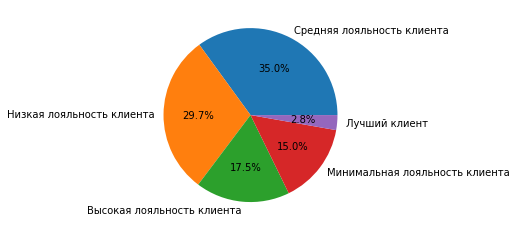

In [37]:
plt.pie(data=itog, x='cnt_client',labels='cat', autopct = '%0.1f%%')

**Способ №2: Разделю базу клиентов на 27 сегментов, основываясь на 3 показателях: Recency, Frequency, Monetary. Анализировать данные буду за 2014 год.**

In [38]:
getdate

Timestamp('2015-01-01 00:00:00')

In [39]:
t

,order_id,order_date,ship_date,ship_mode,customer_name,segment,country,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
33759,ES-2014-2774938,2014-01-01,2014-01-03,Second Class,Fred Harton,Consumer,France,Central,TEC-MA-10001777,Technology,Machines,"Okidata Printer, Red",677.0,3,0.15,-111.6225,104.69,High,2014
33760,IN-2014-47134,2014-01-01,2014-01-05,Standard Class,Kean Nguyen,Corporate,Australia,Oceania,TEC-MA-10002134,Technology,Machines,"Konica Inkjet, Wireless",846.0,3,0.10,46.9980,46.20,Medium,2014
33761,IT-2014-4810734,2014-01-01,2014-01-03,Second Class,Alan Shonely,Consumer,France,Central,TEC-PH-10002586,Technology,Phones,"Nokia Office Telephone, with Caller ID",332.0,6,0.15,-43.1370,37.85,Critical,2014
33762,US-2014-105830,2014-01-01,2014-01-03,First Class,Duane Benoit,Consumer,United States,East,OFF-ST-10002554,Office Supplies,Storage,Tennsco Industrial Shelving,157.0,4,0.20,-35.2152,30.66,High,2014
33763,CA-2014-160395,2014-01-01,2014-01-07,Standard Class,Kelly Lampkin,Corporate,United States,West,OFF-BI-10003984,Office Supplies,Binders,Lock-Up Easel 'Spel-Binder',160.0,7,0.20,53.9217,26.90,Low,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,United States,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",14.0,2,0.20,4.5188,0.89,Medium,2014
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Morocco,Africa,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",4.0,1,0.00,0.4200,0.49,Medium,2014
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Nicaragua,Central,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.0,3,0.00,12.3600,0.35,Medium,2014
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Mexico,North,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.0,1,0.00,0.5600,0.20,Medium,2014


In [40]:
df2014 = t.groupby(['customer_name']). \
      agg({'order_id':'nunique', \
           'order_date':lambda x:(getdate - x.max()).days, \
           'sales':'sum'}).reset_index()

In [41]:
df2014.columns = ['customer_name', 'frequency', 'recency', 'monetary']

In [42]:
df2014.describe()

,frequency,recency,monetary
count,794.000000,794.000000,794.000000
mean,11.167506,23.858942,5415.668766
std,3.290998,23.389573,3027.551268
min,3.000000,1.000000,164.000000
25%,9.000000,7.000000,3246.250000
50%,11.000000,17.000000,4868.000000
75%,13.000000,33.750000,6972.250000
max,24.000000,176.000000,23518.000000


Основная сложность — определить границы сегментов, потому что универсальных рекомендаций по этому поводу нет.

Зададаю собственные интервалы для 3-х показателей.

Для показателя frequency буду основываться на среднем количестве заказов в год.

In [43]:
def frequency_cat (x):
  if x > 13: # более 13 заказов в год
    return '1'
  elif x > 5 and x <=13: # (5; 13] заказов в год
    return '2'
  else: # менее 5 заказов в год
    return '3'


In [44]:
q_33_recency = df2014['recency'].quantile(0.33)
q_66_recency = df2014['recency'].quantile(0.66)

In [45]:
def recency_cat (x):
  if x < q_33_recency: # менее 9 дней назад
    return '1'
  elif x < q_66_recency: # менее 27 дней назад
    return '2'
  else: # более 27 дней назад
    return '3'

In [46]:
def monetary_cat (x):
  if x > 5000: # более 5000$ в год
    return '1'
  elif x > 1000 and x <=5000: # (1000; 5000] $ в год
    return '2' 
  else: # менее 1000 $ в год
    return '3' 


In [47]:
df2014['recency_cat'] = df2014['recency'].apply(recency_cat)
df2014['frequency_cat'] = df2014['frequency'].apply(frequency_cat)
df2014['monetary_cat'] = df2014['monetary'].apply(monetary_cat)

In [48]:
df2014['RFM_itog'] = df2014['recency_cat'] + df2014['frequency_cat'] + df2014['monetary_cat']

In [49]:
df2014 = df2014.sort_values('RFM_itog').reset_index(drop=True)

In [50]:
df2014

,customer_name,frequency,recency,monetary,recency_cat,frequency_cat,monetary_cat,RFM_itog
0,Joni Wasserman,17,6,5589.0,1,1,1,111
1,Nick Crebassa,14,7,7474.0,1,1,1,111
2,Nick Radford,16,3,6555.0,1,1,1,111
3,Barry Pond,15,6,5455.0,1,1,1,111
4,Nicole Hansen,15,6,7317.0,1,1,1,111
...,...,...,...,...,...,...,...,...
789,Jamie Kunitz,5,62,3944.0,3,3,2,332
790,Kristina Nunn,4,99,1426.0,3,3,2,332
791,Roy Collins,5,119,905.0,3,3,3,333
792,Allen Goldenen,4,113,673.0,3,3,3,333


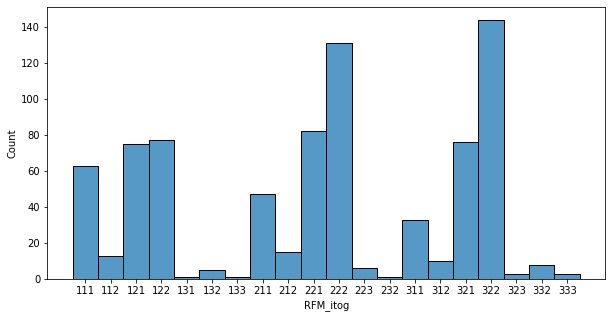

In [51]:
plt.figure(figsize=(10,5))
sns.histplot(data=df2014, x='RFM_itog')


**Выводы:**

1.   Клиенты с 'RFM_itog' == '111' - это клиенты, которые покупают часто, на большие суммы и последняя покупка была недавно. Таким клиентам можно продавать более дорогие товары. Таких клиентов можно просить оставить хороший отзыв о магазине.    
2.   Клиенты с 'RFM_itog' == '333' и '332' - это клиенты, которые платят мало или средне, редко и давно. Таким клиентам можно предложить специальные предложения и скидки, чтобы замотивировать вернуться в магазин. Можно попробовать рекомендовать данной категории людей самые популярные товары.
3.   Клиенты с 'RFM_itog' == '112' - это клиенты, у которых уровень частоты покупок высокий, последнюю покупку совершали недавно, но общая сумма покупок средняя. Для таких клиентов можно сделать персональную скидку на первую покупку с большим чеком.
4.   Клиенты с 'RFM_itog' == '311' - это клиенты, у которых уровень частоты покупок высокий, последнюю покупку совершал давно, общая сумма покупок высокая. Таким клиентам можно посоветовать новинки магазина, чтобы снова заинтересовать клиента вернуться.    

и т.д.

